In [1]:
%pylab inline
from string import ascii_letters

import pandas as pd
import numpy as np
TodasEstaciones = "Est1_Est2_Est3_Est4_Est5.xlsx"
df = pd.read_excel(TodasEstaciones,index_col=0)
print(df.head())
#todasEstaciones.head()

Populating the interactive namespace from numpy and matplotlib
            Est1  Est2  Est3  Est4  Est5  Estx
DIA                                           
2013-01-01   0.0   0.0   4.8   0.0   2.7   0.0
2013-01-02   0.0   0.0   3.5   0.0   6.4   0.0
2013-01-03   1.2   1.2   0.4   0.0   0.0   0.0
2013-01-04   1.1   1.1   2.5   0.0   0.2   0.0
2013-01-05   0.0   0.0   0.0   0.0   0.0   0.0


(array([15706, 15737, 15765, 15796, 15826, 15857, 15887, 15918, 15949,
        15979, 16010, 16040, 16070], dtype=int64),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

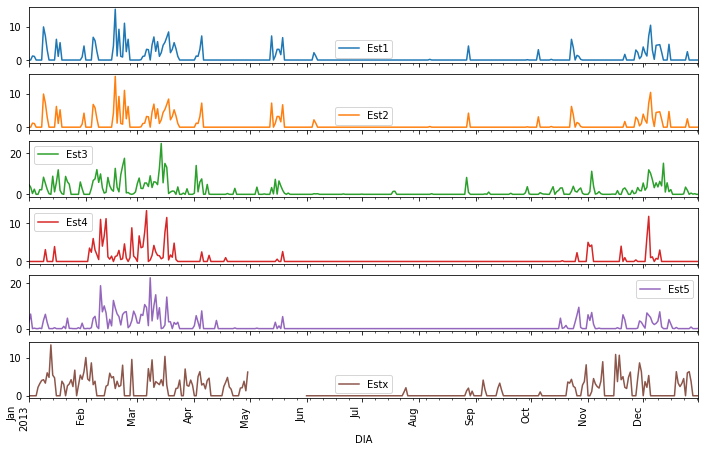

In [2]:
df.plot(subplots=['Est1','Est2','Est3','Est4','Est5','Estx'], figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')

In [3]:
import seaborn as sns
#x_train = TodasEstaciones.loc['1963':'1989',['Est1','Est3']].astype(float32).values
#y_train = TodasEstaciones.loc['1963':'1989',['Est2']].astype(float32).values
x_train = df.loc['2013-01-01':'2013-12-31',['Est1','Est2','Est3','Est4','Est5']].astype(float32).values
y_train = df.loc['2013-01-01':'2013-12-31',['Estx']].astype(float32).values

In [4]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(x_train)
x_train= scaler.transform(x_train)

In [5]:
x_train[:20]

array([[-0.39871722, -0.39871722,  0.948019  , -0.31968224,  0.5298519 ],
       [-0.39871722, -0.39871722,  0.5537036 , -0.31968224,  1.8278112 ],
       [ 0.18849915,  0.18849915, -0.38658696, -0.31968224, -0.41730762],
       [ 0.13956445,  0.13956445,  0.25038403, -0.31968224, -0.34714767],
       [-0.39871722, -0.39871722, -0.5079148 , -0.31968224, -0.41730762],
       [-0.39871722, -0.39871722, -0.5079148 , -0.31968224, -0.41730762],
       [-0.39871722, -0.39871722,  0.18972012, -0.31968224, -0.34714767],
       [-0.39871722, -0.39871722,  0.1593882 , -0.31968224, -0.41730762],
       [ 4.4458175 ,  4.4458175 ,  2.0096374 , -0.31968224,  0.8806518 ],
       [ 3.1245809 ,  3.1245809 ,  1.1300107 ,  1.3627384 ,  1.7927314 ],
       [ 1.0693237 ,  1.0693237 ,  0.22005212, -0.31968224,  0.5298519 ],
       [-0.39871722, -0.39871722, -0.41691893, -0.31968224, -0.41730762],
       [-0.39871722, -0.39871722, -0.5079148 , -0.31968224, -0.41730762],
       [-0.39871722, -0.39871722,  2.1

In [146]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2,activation='linear', input_shape=(5,)))
model.add(Dense(4, activation='linear'))
model.add(Dense(8,activation='linear'))
model.add(Dense(1,activation='linear'))
model.add(Dense(13,activation='linear'))

model.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1392 (Dense)           (None, 2)                 12        
_________________________________________________________________
dense_1393 (Dense)           (None, 4)                 12        
_________________________________________________________________
dense_1394 (Dense)           (None, 8)                 40        
_________________________________________________________________
dense_1395 (Dense)           (None, 1)                 9         
_________________________________________________________________
dense_1396 (Dense)           (None, 13)                26        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


(365, 13)


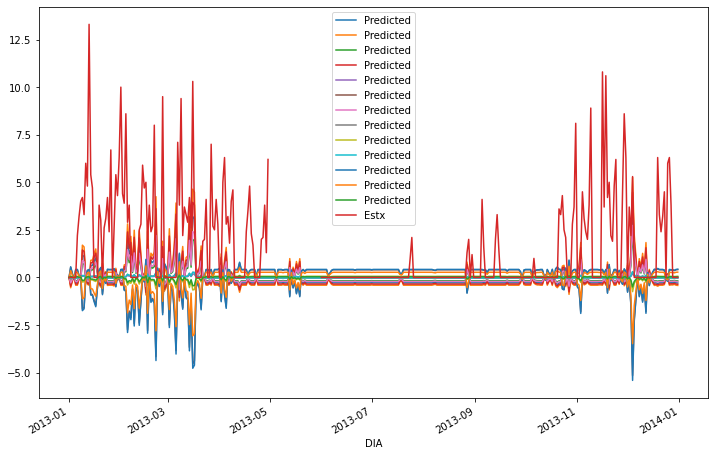

In [147]:
y_pred =model.predict(x_train)
print (y_pred.shape)

plot(df.loc['2013-01-01':'2013-12-31'].index,y_pred,label='Predicted')
df['Estx'].loc['2013-01-01':'2013-12-31'].plot()
figsize(12,8)
legend(loc='best')